In [3]:
pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 6.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 5.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.1_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

In [5]:
import numpy as np

In [12]:
pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.1_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.1_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 5.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 6.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.1_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [28]:
# Load the datasets
train_data = pd.read_csv("./train_.csv")
test_data = pd.read_csv("./test_.csv")
pincodes_data = pd.read_csv("./pincodes.csv", low_memory=False)

In [32]:
# Explore data
print(train_data.head())

          id order_delivered_date  courier_partner_id order_shipped_date  \
0  349197554           2022-06-05                   9         2022-06-02   
1  349197557           2022-06-04                   9         2022-06-02   
2  349197560           2022-06-07                   9         2022-06-02   
3  349197565           2022-06-05                   9         2022-06-02   
4  349197568           2022-06-07                   9         2022-06-02   

   account_type_id  drop_pin_code  pickup_pin_code  quantity account_mode  \
0             2471         141007           421311         1          Air   
1             2471         411047           421311         1          Air   
2             2471         145029           421311         1          Air   
3             2471         751015           562123         1          Air   
4             2471         145029           421311         1          Air   

   order_delivery_sla  
0                   3  
1                   2  
2       

In [33]:
print(test_data.head())

          id  courier_partner_id order_shipped_date  account_type_id  \
0  428365149                   3         2022-09-02             2520   
1  428365152                   3         2022-09-02             2520   
2  428365154                   3         2022-09-02             2520   
3  428365156                   3         2022-09-02             2520   
4  428365161                   3         2022-09-02             2520   

   drop_pin_code  pickup_pin_code  quantity account_mode  
0         243001           122506         1          Air  
1         209502           122506         1          Air  
2         147001           122506         1          Air  
3         245101           122506         1          Air  
4         305901           122506         1          Air  


In [34]:
print(pincodes_data.head())

              CircleName      RegionName       DivisionName  \
0  Andhra Pradesh Circle  Kurnool Region  Hindupur Division   
1  Andhra Pradesh Circle  Kurnool Region  Hindupur Division   
2  Andhra Pradesh Circle  Kurnool Region  Hindupur Division   
3  Andhra Pradesh Circle  Kurnool Region  Hindupur Division   
4  Andhra Pradesh Circle  Kurnool Region  Hindupur Division   

            OfficeName  Pincode OfficeType  Delivery   District  \
0       Peddakotla B.O   515631         BO  Delivery  ANANTAPUR   
1       Pinnadhari B.O   515631         BO  Delivery  ANANTAPUR   
2  Yerraguntapalle B.O   515631         BO  Delivery  ANANTAPUR   
3  Obulareddipalli B.O   515581         BO  Delivery  ANANTAPUR   
4       Odulapalli B.O   515581         BO  Delivery  ANANTAPUR   

        StateName   Latitude  Longitude  
0  ANDHRA PRADESH    14.5689   77.85624  
1  ANDHRA PRADESH    14.5281  77.857014  
2  ANDHRA PRADESH  14.561111   77.85715  
3  ANDHRA PRADESH    14.2488    78.2588  
4  ANDHR

In [36]:
# Data Preprocessing
train_data['order_shipped_date'] = pd.to_datetime(train_data['order_shipped_date'])

In [37]:
train_data['order_delivered_date'] = pd.to_datetime(train_data['order_delivered_date'])

In [39]:
# Feature engineering: calculate actual SLA in training set
train_data['actual_sla'] = (train_data['order_delivered_date'] - train_data['order_shipped_date']).dt.days

In [44]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
categorical_cols = ['courier_partner_id', 'account_type_id', 'account_mode']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    
    # Fit the LabelEncoder on train data
    train_data[col] = le.fit_transform(train_data[col])
    label_encoders[col] = le
    
    # Transform test data, handling unseen labels
    test_data[col] = test_data[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)


In [45]:
# Feature selection
features = [
    'order_shipped_date', 'quantity', 'courier_partner_id',
    'account_type_id', 'drop_pin_code', 'pickup_pin_code', 'account_mode'
]
target = 'actual_sla'

In [46]:
# Convert dates into numerical values for the model
train_data['order_shipped_date'] = train_data['order_shipped_date'].astype(int) / 10**9
test_data['order_shipped_date'] = pd.to_datetime(test_data['order_shipped_date']).astype(int) / 10**9

In [47]:
# Split data for training and validation
X = train_data[features]
y = train_data[target]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Model training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [49]:
# Model validation
y_pred = rf_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Validation RMSE: {rmse}")

Validation RMSE: 0.7601252529590619


In [50]:
# Feature importance
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances)

              Feature  Importance
2  courier_partner_id    0.373501
4       drop_pin_code    0.366301
0  order_shipped_date    0.146914
5     pickup_pin_code    0.087783
6        account_mode    0.018469
3     account_type_id    0.007031
1            quantity    0.000000


In [51]:
# Test prediction
test_data['predicted_exact_sla'] = rf_model.predict(test_data[features])

In [57]:
# Save submission
submission = test_data[['id', 'predicted_exact_sla']]
submission.to_csv("submission.csv", index=False)

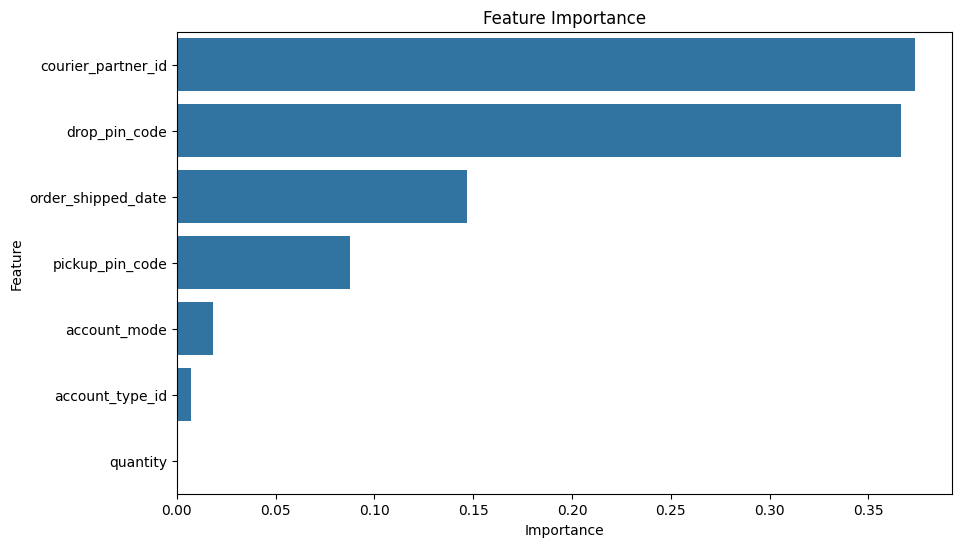

In [58]:
# Visualization of feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()